# Gravity attraction - Solid sphere

**Reference: Blakely (1996)**

In [2]:
# Importing all usefull libraries
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Positions and number of points
n = 1000
x = np.linspace(-5000, 5000, n)
y = np.copy(x)
z = -100.
# Computes the mesh of all points
X, Y = np.meshgrid(x, y)

In [34]:
# Setting the parameters for a sphere
model1 = [2000., -2000., 700., 500., 2000.] # meters + kg/m3
model2 = [0., 2000., 700., 500., 3000.] # meters + kg/m3
model3 = [-2000., -2000., 700., 1000., 500.] # meters + kg/m3

In [45]:
# Importing the functions
from codes.sphere import sphere_gz # Gravity vertical attraction
from codes.auxiliars import addnoise # Noised function
from codes.statistical import analysis # Statistical module 

In [46]:
# Calculating the gravity attraction
gz = sphere_gz(X, Y, z, model1) + sphere_gz(X, Y, z, model2) + sphere_gz(X, Y, z, model3)

In [47]:
# Analyzing
_ = analysis(gz, 'mGal')

Minimum:    0.0650 mGal
Maximum:    22.0086 mGal
Mean value: 1.6388 mGal
Variation:  21.9436 mGal


In [64]:
# Adding noise e checking the new values
noised = addnoise(gz, 0.5, 0.01)
_ = analysis(noised, 'mGal')

Minimum:    0.5365 mGal
Maximum:    22.5155 mGal
Mean value: 2.1388 mGal
Variation:  21.9790 mGal


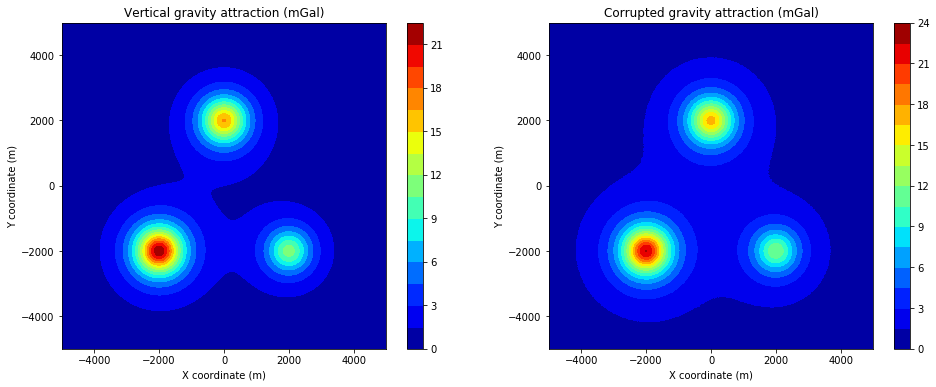

In [65]:
# Plotting the result for approximated total field anomaly
plt.close('all')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.contourf(X, Y, gz, 20, cmap = plt.cm.jet)
plt.title('Vertical gravity attraction (mGal)')
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(X, Y, noised, 20, cmap = plt.cm.jet)
plt.title('Corrupted gravity attraction (mGal)')
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')
plt.colorbar()

plt.savefig('figures\sphere-gz.png')

plt.show()